![Add a relevant banner image here](path_to_image)

# **Flatiron Data Science Capstone Project 1: US Traffic Accidents**


## Overview

text here


# Business Understanding

The US Department of Transportation (DOT) is concerned about the number of traffic accidents across the US and wants to develop strategies to reduce accidents and improve road safety.

For the Department of Transportation (DOT), understanding and reducing traffic accidents is a critical mission that directly impacts public safety, economic costs, and quality of life across the United States.

This analysis matters from a stakeholder and business perspective:

-Economic Impact: Traffic accidents cost billions annually in medical expenses, property damage, and lost productivity, making even small reductions highly valuable.

-Public Safety: As a leading cause of injury and death, reducing traffic accidents directly fulfills DOT's core mandate to protect citizens.

-Infrastructure Prioritization: Data analysis enables strategic allocation of limited infrastructure improvement budgets to highest-risk areas.

-Policy Development: Accident data informs new safety regulations and provides metrics to evaluate existing programs' effectiveness.

-Stakeholder Accountability: Comprehensive analysis demonstrates evidence-based decision-making to Congress, local governments, and the public.

-Cross-Agency Collaboration: Shared data insights can align accident reduction efforts across DOT, law enforcement, and emergency services.

-Technology Integration: Understanding accident patterns guides how emerging vehicle technologies should be regulated to maximize safety benefits.

This project supports DOT's mission by translating complex accident data into actionable insights. By identifying key patterns and risk factors, it empowers smarter infractstructure investment, better regulation and ultimately safer roads for all.

Project Objectives:
1. Identify accident hotspots: This analysis will determine when and where accidents most frequently occur.  Patterns such as time of day, day of week, season, and geographic location will be examined to determine of there are critical hotspots and time periods that may warrant intervention.
2. Analyze environmental risk factors: This analysis will determine how weather conditions correlate with accident rates. Factors such as visibility, precipitation, temperature and other environmental variables will be examined to assess their impact on driver behavior and road conditions. The goal is to determine if certain weather conditions should trigger early warning notifications to drivers.
3. Identify infrastructure considerations: This analysis will determine how specific road features are associated with accident severity. This will include road design, signage, lighting, and other infrastructural elements that could contribute to or mitigate accident risk

By successfully identifying accident hotspots, environmental risk factors, and infracture considerations, DOT can execute initiatives to address these issues and fulfill its mission to the public.

# Data Understanding

Explore the US Accidents dataset to understand its structure, variables, scope, and limitations. Identify potential issues with the data and assess its suitability for addressing the business problem.

## Data Understanding - Overall

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Load relevant imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stats
import scipy
import holidays

us_holidays = holidays.UnitedStates()  # Create a US holidays object to check for holidays

# column definitions in Onedrive


In [6]:
# load data
# df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv')

# PC path to the CSV file
df = pd.read_csv(r"C:\Users\jtlee\OneDrive\Documents\Flatiron Schoolwork\DS_11 Capstone\Project 1 US Traffic Accidents\US_Accidents_March23.csv")

# add laptop path to CSV file
# df = pd.read_csv(r'C:\Users\eeleoj62\OneDrive\Documents\Flatiron Schoolwork\DS_11 Capstone\Project 1 US Traffic Accidents\US_Accidents_March23.csv')

In [7]:
print(f"\nShape of US accidents dataset: {df.shape}\n")     # (rows, columns)

df.info()  # DataFrame info


Shape of US accidents dataset: (7728394, 46)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Ch

In [8]:
print(f"Print preview of the dataframe:\n")
print(df.head())

Print preview of the dataframe:

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False 

In [9]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
# convert severity to categories (for EDA and readibility)
severity_map = {
    1: 'Low',
    2: 'Moderate', 
    3: 'High',
    4: 'Severe'
}

df['Severity_Level'] = df['Severity'].map(severity_map)

## Data Understanding - Objective 1 Accident hotspot analysis

Will look at patterns such as time of day, day of week, season, and geogrpahic location

Temporal features:
Start time can be used to determine time of day categorized into periods such as morning, afternoon and evening to assess whether accidents occur during certain windows. Day of week - accidents may increase on certain weekdays such as Fridays due to end of week fatigure or increased traffic. Season - month of the year will be mapped to seasons to explore weather or seasonal patterns. using US federal holiday calendars we will tag whether accidents occurred on or during holidays when traffic and risk behaviors may increase 

Geographic features:
Geographic location will be determined using state, county and zip code. This will help identify regions with higher accident concentrations, supporting hotspot detection at multiple geographic levels.

Together, these temporal and spatial insights will help the DOT pinpoint high-risk times and locations, enabling targeted interventions such as increased patrols, public service campaigns, or infrastructure investment.

In [11]:
# Create new dataframe for objective 1 accident hotspot analysis

df_hotspots = df[['ID', 'Severity_Level', 'Start_Time', 'City', 'County', 'State', 'Zipcode', ]].copy()

print(f"Shape of hotspots df: {df_hotspots.shape}")
print(df_hotspots.info())
print(df_hotspots.isnull().sum())


Shape of hotspots df: (7728394, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ID              object
 1   Severity_Level  object
 2   Start_Time      object
 3   City            object
 4   County          object
 5   State           object
 6   Zipcode         object
dtypes: object(7)
memory usage: 412.7+ MB
None
ID                   0
Severity_Level       0
Start_Time           0
City               253
County               0
State                0
Zipcode           1915
dtype: int64


253 missing City and 1,915 zipcode values out of 7.7 million data points is not significant. They will be dropped, as they shouldn't hurt the analysis at all

In [12]:
# check for unique states and their counts
print(f"\nUnique states: {sorted(df['State'].unique())}")
print(f"\nNumber of states included in the dataset: {df['State'].nunique()}")



Unique states: ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

Number of states included in the dataset: 49


It appears that there are only 49 states included in this US accidents dataset. Upon further examination, DC has been included, and Alaska and Hawaii are not present in the data.

## Data Understanding - Objective 2 Environmental Risk Factors

Will look at environmental factors such as temperature, wind chill, humidity, pressure, visibility, wind speed, precipitation, and weather condition

In [13]:
# Create new dataframe for objective 1 accident hotspot analysis

df_weather = df[['ID', 'Severity_Level', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition' ]].copy()

print(f"Shape of weather df: {df_weather.shape}")
print(df_weather.info())
print(df_weather.isnull().sum())

Shape of weather df: (7728394, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity_Level     object 
 2   Temperature(F)     float64
 3   Wind_Chill(F)      float64
 4   Humidity(%)        float64
 5   Pressure(in)       float64
 6   Visibility(mi)     float64
 7   Wind_Speed(mph)    float64
 8   Precipitation(in)  float64
 9   Weather_Condition  object 
dtypes: float64(7), object(3)
memory usage: 589.6+ MB
None
ID                         0
Severity_Level             0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
dtype: int64


There are missing values, most notably Wind_Chill and Precipitation, and to an extent wind speed

Temperature -> impute with median temp
Wind_chill -> impute with Temperature
Humidity -> impute with median humidity
Pressure -> impute with median pressure
visibility -> impute with median visibility
wind speed -> conditional median imputation 
df['Wind_Speed(mph)'] = df.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))
precipitation -> impute 0 (no rain)
weather condition -> impute 'Unknown'

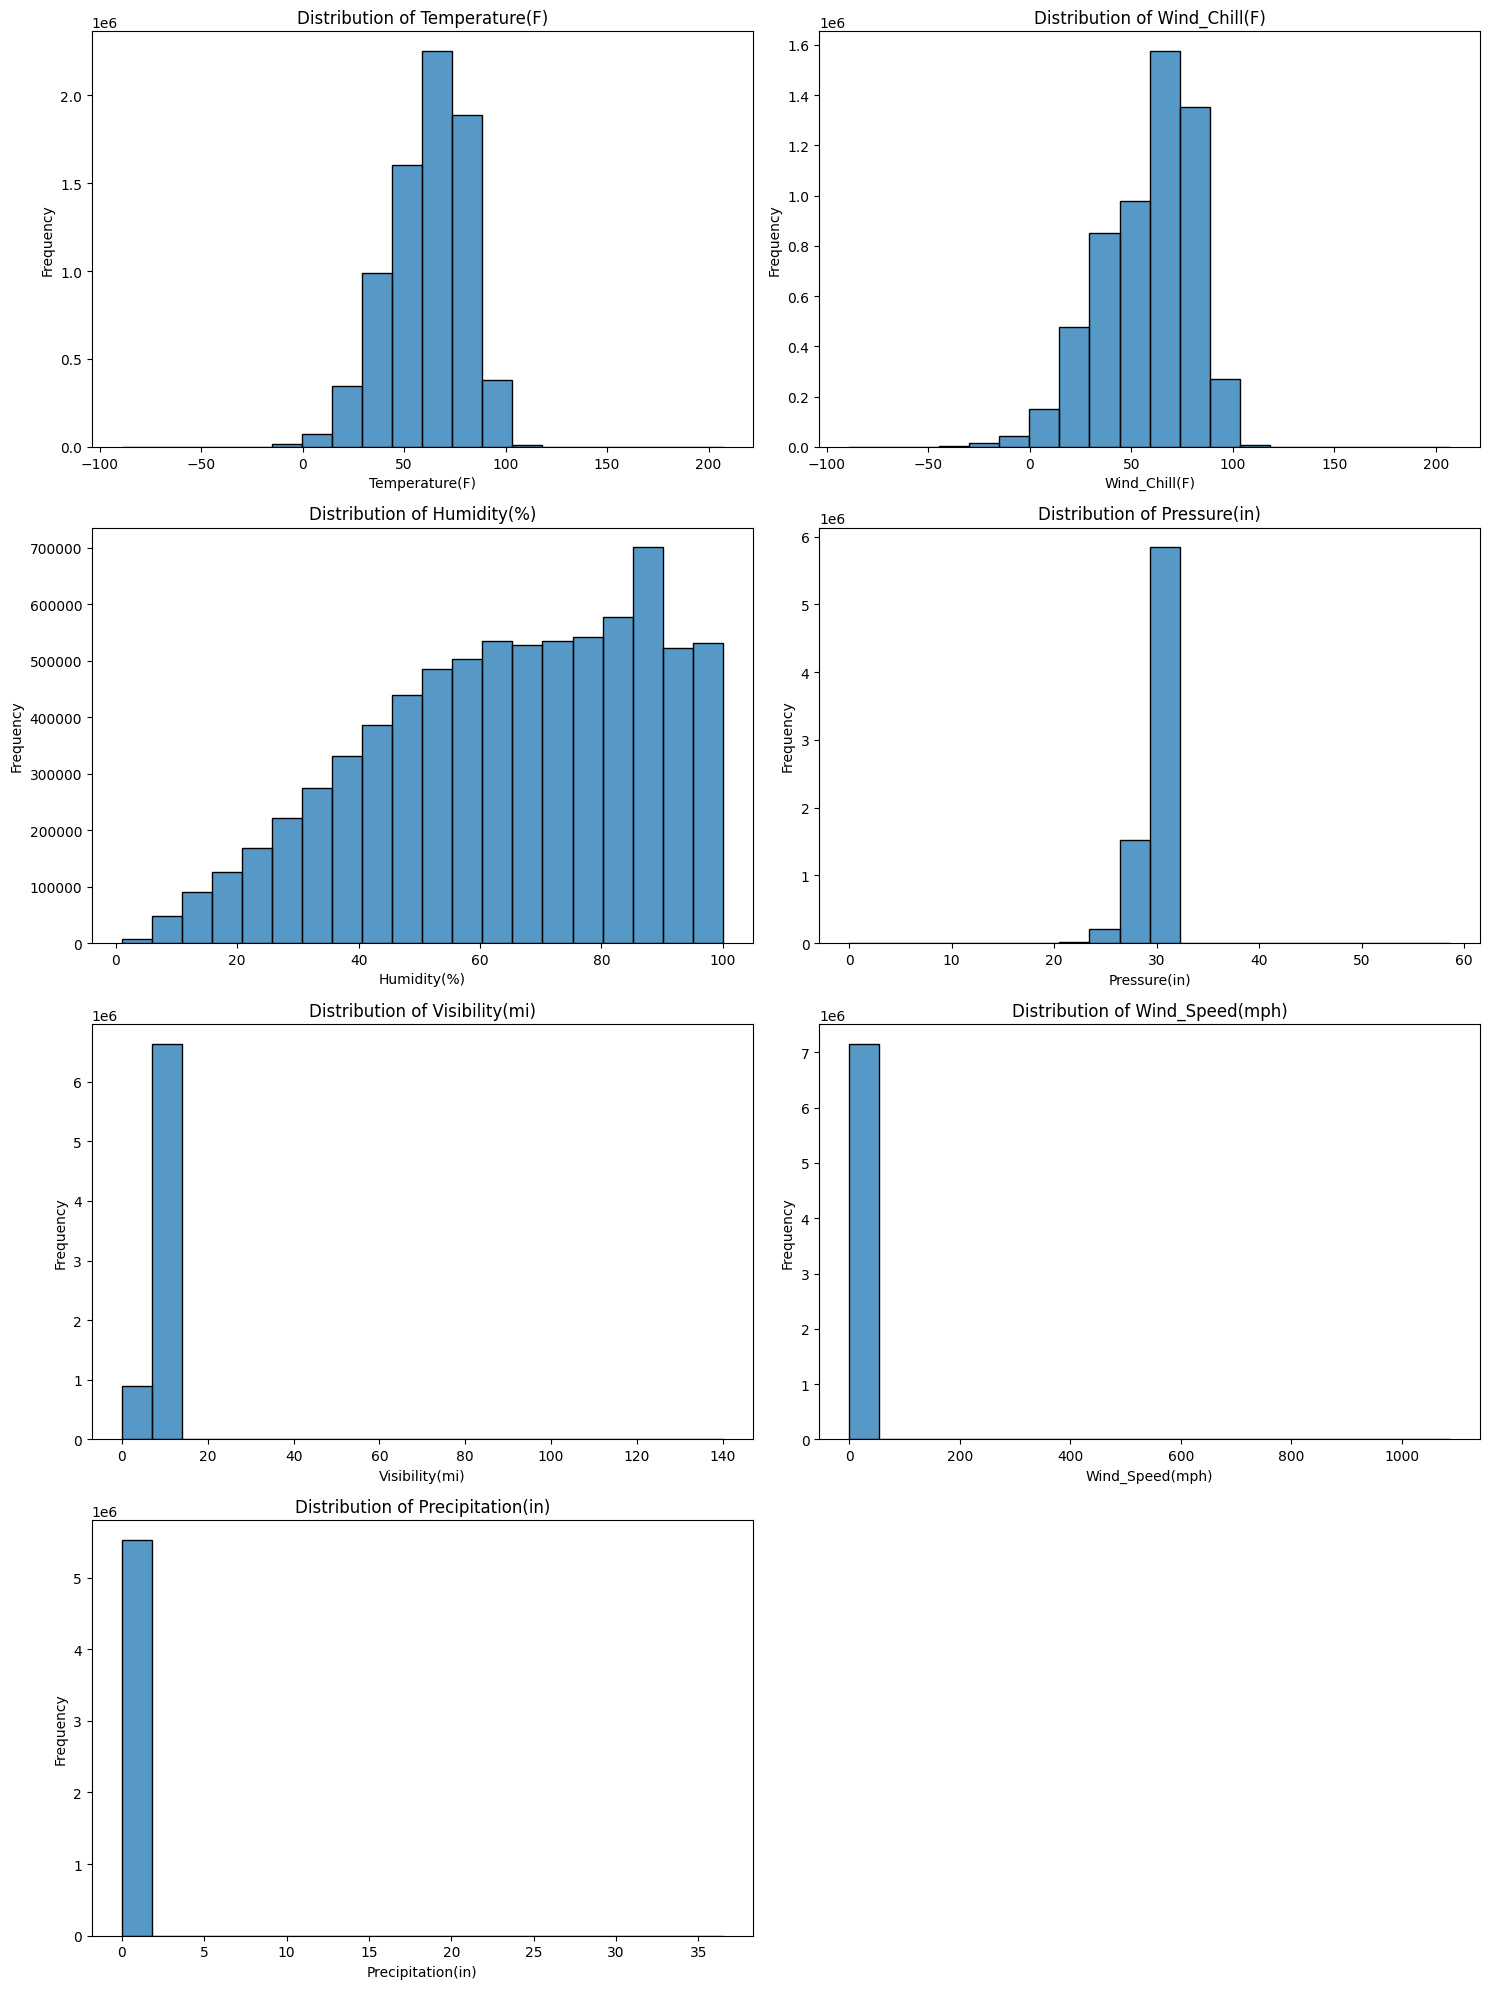

In [14]:
# visualize weather distributions

weather_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Set up subplots: 4 rows, 2 columns (adjust layout as needed)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Plot each weather feature in a subplot
for i, col in enumerate(weather_cols):
    sns.histplot(df_weather[col].dropna(), bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot if cols < subplots
for j in range(len(weather_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Check for outliers in temperature, pressure, visiblity, wind speed, and precipitation

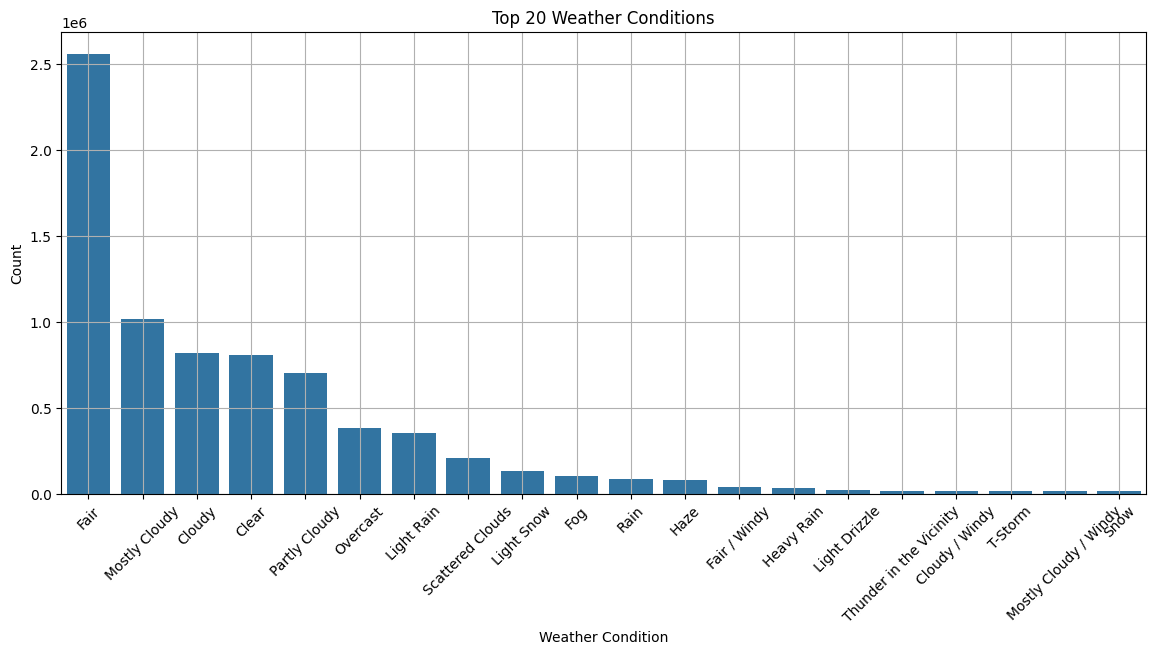

In [15]:
# visualize weather conditions

plt.figure(figsize=(14, 6))
top_weather = df['Weather_Condition'].value_counts().head(20)

sns.barplot(x=top_weather.index, y=top_weather.values)
plt.xticks(rotation=45)
plt.title('Top 20 Weather Conditions')
plt.ylabel('Count')
plt.xlabel('Weather Condition')
plt.grid(True)
plt.show()


## Data Understanding - Objective 3 Infrastructure Considerations


Examine infrastructure data for the bumps, crossings, yield signs, junctions, dead-ends/no-exit roads, railway crossings, roundabouts, stations (train, gas, etc.), stop signs, traffic calming features, traffic lights, and turning loops.

In [16]:
# Create new dataframe for objective 3 infrastructure analysis

df_infra = df[['ID', 'Severity_Level', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

print(f"Shape of infrastructure df: {df_infra.shape}")
print(df_infra.info())
print(df_infra.isnull().sum())

Shape of infrastructure df: (7728394, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ID               object
 1   Severity_Level   object
 2   Bump             bool  
 3   Crossing         bool  
 4   Give_Way         bool  
 5   Junction         bool  
 6   No_Exit          bool  
 7   Railway          bool  
 8   Roundabout       bool  
 9   Station          bool  
 10  Stop             bool  
 11  Traffic_Calming  bool  
 12  Traffic_Signal   bool  
 13  Turning_Loop     bool  
dtypes: bool(12), object(2)
memory usage: 206.4+ MB
None
ID                 0
Severity_Level     0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64


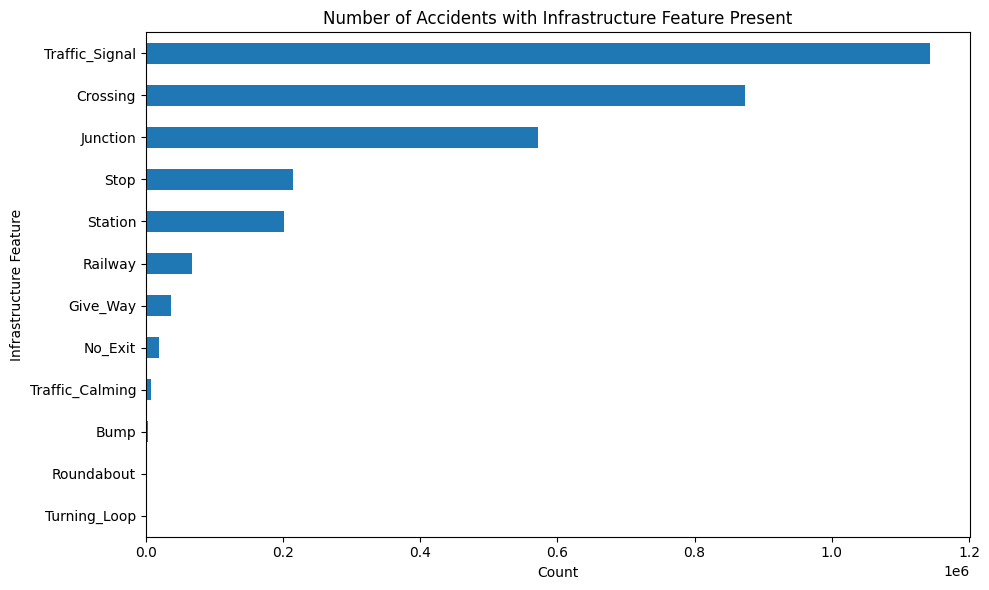

In [17]:
# visualize presence of infrastructure

infra_cols = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

infra_counts = df_infra[infra_cols].sum().sort_values()

plt.figure(figsize=(10, 6))
infra_counts.plot(kind='barh')
plt.title('Number of Accidents with Infrastructure Feature Present')
plt.xlabel('Count')
plt.ylabel('Infrastructure Feature')
plt.tight_layout()
plt.show()

# Data Preparation

Clean and preprocess the data, handling missing values, outliers, and duplicates. Create derived features that might provide additional insights (e.g., time of day categories, weather condition groupings).


## Data Prep - Objective 1 Accident hotspot analysis

In [18]:
# drop rows with missing City and Zipcode values
df_hotspots.dropna(subset=['City', 'Zipcode'], inplace=True)
df_hotspots.shape

(7726228, 7)

In [19]:
# take Start Time column and convert to datetime format
df_hotspots['Start_Time'] = pd.to_datetime(df_hotspots['Start_Time'], format='mixed', errors='coerce')

# create new column for time of day (hour of the day)
df_hotspots['Time_of_day'] = df_hotspots['Start_Time'].dt.hour

# create new column for day of week
# df_hotspots['day_of_week'] = df_hotspots['Start_Time'].dt.dayofweek

# convert day of week to actual day name
df_hotspots['Day_of_week'] = df_hotspots['Start_Time'].dt.day_name()

# Create a new column for whether the accident occurred on a holiday
df_hotspots['Is_Holiday'] = df_hotspots['Start_Time'].apply(
    lambda x: x.date() in us_holidays if pd.notnull(x) else False
)

print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

      Zipcode  Time_of_day Day_of_week  Is_Holiday  
0       45424            5      Monday       False  
1  43068-3402            6      Monday       False  
2       45176            6      Monday       False  
3       45417            7      Monday       False  
4       45459            7      Monday       False  


In [20]:
# define a function to get the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    
df_hotspots['Season'] = df_hotspots['Start_Time'].dt.month.apply(get_season)

print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

      Zipcode  Time_of_day Day_of_week  Is_Holiday  Season  
0       45424            5      Monday       False  Winter  
1  43068-3402            6      Monday       False  Winter  
2       45176            6      Monday       False  Winter  
3       45417            7      Monday       False  Winter  
4       45459            7      Monday       False  Winter  


In [21]:
# Check of consistency of spelling in top 50 city and county columns
print(df_hotspots['City'].value_counts().head(50))
print(df_hotspots['County'].value_counts().head(50))


City
Miami              186917
Houston            169609
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68186
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38178
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35399
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27410
New Orleans         27354
Bronx               27297
Rochester           26866
Fort Lauderdale     26205
Detroit             24865
Grand R

In [22]:
# extract just the first 5 digits of the Zipcode column
# This is to ensure that the Zipcode column is in the correct format
df_hotspots['Zipcode'] = df_hotspots['Zipcode'].astype(str).str.extract(r'^(\d{5})')
print(df_hotspots['Zipcode'].value_counts().head(50))
print(df_hotspots['Zipcode'].unique())

Zipcode
27610    12907
33186    11952
32819    11894
91761    11455
70808    10971
28205    10797
91706    10556
28208    10411
27604    10185
37211     9931
92407     9925
28216     9832
33169     9809
70816     9762
92507     9548
70802     9381
28217     9354
90022     9333
33155     9225
29615     9168
90023     9153
29210     8965
32837     8817
33168     8817
28273     8792
27603     8727
37013     8641
70809     8415
91748     8389
27612     8226
33150     8222
37210     8142
28262     8137
75243     8083
32839     8078
37207     8009
27606     7913
78753     7870
27616     7809
90248     7724
29223     7719
91765     7695
27529     7634
90012     7565
33157     7536
92324     7515
28206     7450
32809     7407
27609     7265
33165     7200
Name: count, dtype: int64
['45424' '43068' '45176' ... '69120' '38614' '04231']


In [23]:
print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

  Zipcode  Time_of_day Day_of_week  Is_Holiday  Season  
0   45424            5      Monday       False  Winter  
1   43068            6      Monday       False  Winter  
2   45176            6      Monday       False  Winter  
3   45417            7      Monday       False  Winter  
4   45459            7      Monday       False  Winter  


In [24]:
# group accidents by time of day, group further into periods of the day
def convert_hour_to_period(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_hotspots['Time_period'] = df_hotspots['Time_of_day'].apply(convert_hour_to_period)
print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

  Zipcode  Time_of_day Day_of_week  Is_Holiday  Season Time_period  
0   45424            5      Monday       False  Winter  Late Night  
1   43068            6      Monday       False  Winter     Morning  
2   45176            6      Monday       False  Winter     Morning  
3   45417            7      Monday       False  Winter     Morning  
4   45459            7      Monday       False  Winter     Morning  


In [25]:
# examining value counts for the time periods
df_hotspots['Time_period'].value_counts()

Time_period
Morning       2631131
Afternoon     2307603
Evening       1527989
Late Night     774162
Night          485343
Name: count, dtype: int64

In [26]:
# examining value counts for days of the week
df_hotspots['Day_of_week'].value_counts()

Day_of_week
Friday       1366143
Thursday     1315850
Wednesday    1312030
Tuesday      1290592
Monday       1210587
Saturday      668470
Sunday        562556
Name: count, dtype: int64

In [27]:
# examining value counts for holidays
df_hotspots['Is_Holiday'].value_counts()

Is_Holiday
False    7497666
True      228562
Name: count, dtype: int64

In [28]:
print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

  Zipcode  Time_of_day Day_of_week  Is_Holiday  Season Time_period  
0   45424            5      Monday       False  Winter  Late Night  
1   43068            6      Monday       False  Winter     Morning  
2   45176            6      Monday       False  Winter     Morning  
3   45417            7      Monday       False  Winter     Morning  
4   45459            7      Monday       False  Winter     Morning  


## Data Prep - Objective 2 Environmental risk 

Temperature -> impute with median temp
Wind_chill -> impute with Temperature
Humidity -> impute with median humidity
Pressure -> impute with median pressure
visibility -> impute with median visibility
wind speed -> conditional median imputation 
df['Wind_Speed(mph)'] = df.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))
precipitation -> impute 0 (no rain)
weather condition -> impute 'Unknown'

In [29]:
# determine outliers in temperature
print("\nTemperature statistics:")

print(df_weather['Temperature(F)'].describe())

Q1 = df_weather['Temperature(F)'].quantile(0.25)
Q3 = df_weather['Temperature(F)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# filter out outliers
df_weather = df_weather[df_weather['Temperature(F)'] <= 130]  # Ensure no extreme outliers above 130, anything over 130 is highly unlikely in the US

df_weather = df_weather[df_weather['Temperature(F)'] >= -60]  # Ensure no extreme outliers below -60, anything under is highly unlikely in the continental US

print(df_weather['Temperature(F)'].describe())


Temperature statistics:
count    7.564541e+06
mean     6.166329e+01
std      1.901365e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      2.070000e+02
Name: Temperature(F), dtype: float64
count    7.564476e+06
mean     6.166312e+01
std      1.901064e+01
min     -5.800000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      1.292000e+02
Name: Temperature(F), dtype: float64


In [30]:
# determine outliers in pressure
print("\nPressure statistics:")
print(df_weather['Pressure(in)'].describe())
Q1 = df_weather['Pressure(in)'].quantile(0.25)
Q3 = df_weather['Pressure(in)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
# filter out outliers
df_weather = df_weather[df_weather['Pressure(in)'] <= upper_bound]
print(df_weather['Pressure(in)'].describe())


Pressure statistics:
count    7.556568e+06
mean     2.953969e+01
std      1.004499e+00
min      0.000000e+00
25%      2.937000e+01
50%      2.986000e+01
75%      3.003000e+01
max      5.863000e+01
Name: Pressure(in), dtype: float64
count    7.556456e+06
mean     2.953950e+01
std      1.002692e+00
min      0.000000e+00
25%      2.937000e+01
50%      2.986000e+01
75%      3.003000e+01
max      3.102000e+01
Name: Pressure(in), dtype: float64


In [31]:
# determine outliers in visibility
print("\nVisibility(mi) statistics:")

print(df_weather['Visibility(mi)'].describe())

Q1 = df_weather['Visibility(mi)'].quantile(0.25)
Q3 = df_weather['Visibility(mi)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_weather = df_weather[df_weather['Visibility(mi)'] <= upper_bound]

print(df_weather['Visibility(mi)'].describe())


Visibility(mi) statistics:
count    7.517598e+06
mean     9.091059e+00
std      2.677726e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64
count    7.487217e+06
mean     9.032558e+00
std      2.337127e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.000000e+01
Name: Visibility(mi), dtype: float64


In [32]:
# determine outliers in wind speed
print("\nWind_Speed(mph) statistics:")

print(df_weather['Wind_Speed(mph)'].describe())

Q1 = df_weather['Wind_Speed(mph)'].quantile(0.25)
Q3 = df_weather['Wind_Speed(mph)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_weather = df_weather[df_weather['Wind_Speed(mph)'] <= 100] # Ensure no extreme outliers above 100 mph, anything over is highly unlikely in the US

print(df_weather['Wind_Speed(mph)'].describe())


Wind_Speed(mph) statistics:
count    7.077023e+06
mean     7.684673e+00
std      5.410428e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64
count    7.076901e+06
mean     7.680926e+00
std      5.257325e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.000000e+02
Name: Wind_Speed(mph), dtype: float64


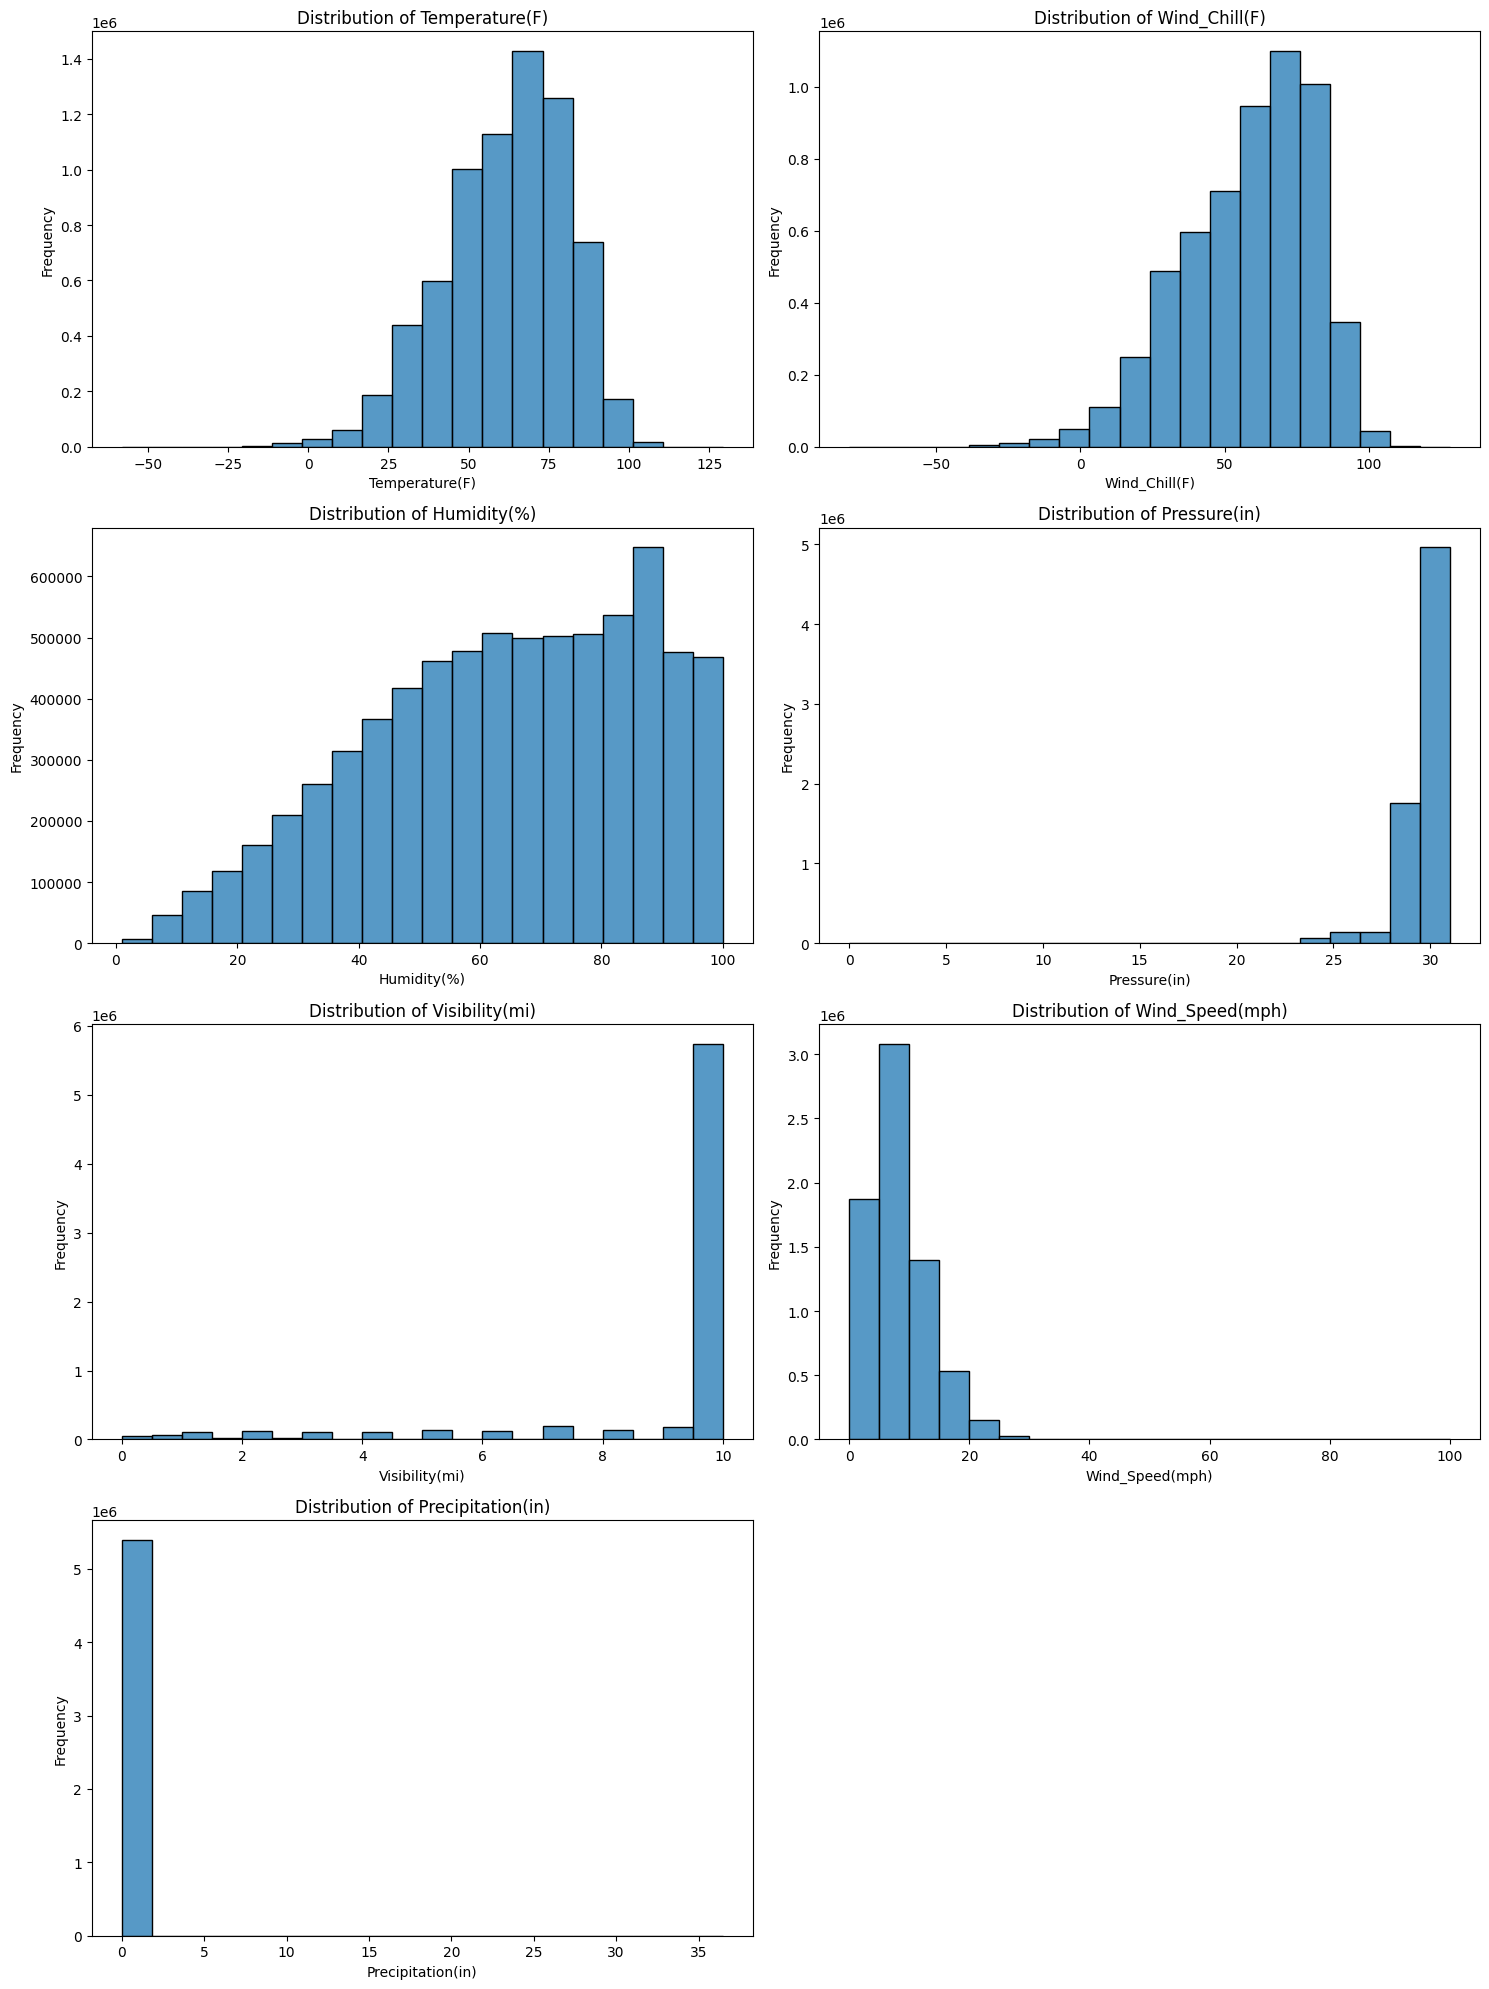

In [33]:
# visualize weather again to ensure outliers have been removed
# Set up subplots: 4 rows, 2 columns (adjust layout as needed)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Plot each weather feature in a subplot
for i, col in enumerate(weather_cols):
    sns.histplot(df_weather[col].dropna(), bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot if cols < subplots
for j in range(len(weather_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Temperature -> impute with median temp
Wind_chill -> impute with Temperature
Humidity -> impute with median humidity
Pressure -> impute with median pressure
visibility -> impute with median visibility
wind speed -> conditional median imputation 
df['Wind_Speed(mph)'] = df.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))
precipitation -> impute 0 (no rain)
weather condition -> impute 'Unknown'

In [34]:
# impute missing values in temperature column with median temperature
df_weather['Temperature(F)'].fillna(df_weather['Temperature(F)'].median(), inplace=True)

# impute missing values in wind chill column with median wind chill
df_weather['Wind_Chill(F)'].fillna(df_weather['Wind_Chill(F)'].median(), inplace=True)

# impute missing values in humidity column with median humidity
df_weather['Humidity(%)'].fillna(df_weather['Humidity(%)'].median(), inplace=True)

# impute missing values in pressure with median pressure
df_weather['Pressure(in)'].fillna(df_weather['Pressure(in)'].median(), inplace=True)

# impute missing values in visibility with median visibility
df_weather['Visibility(mi)'].fillna(df_weather['Visibility(mi)'].median(), inplace=True)

# impute missing values in wind speed with median wind speed
df_weather['Wind_Speed(mph)'] = df_weather.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))

# impute missing values in precipitation column with 0 (no rain)
df_weather['Precipitation(in)'].fillna(0, inplace=True)

# impute missing values in weather condition column with 'Clear'
df_weather['Weather_Condition'].fillna('Clear', inplace=True)

C:\Users\jtlee\AppData\Local\Temp\ipykernel_15868\3237809773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['Temperature(F)'].fillna(df_weather['Temperature(F)'].median(), inplace=True)
C:\Users\jtlee\AppData\Local\Temp\ipykernel_15868\3237809773.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [35]:
print(df_weather.head())

    ID Severity_Level  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
2  A-3       Moderate            36.0           33.3        100.0   
3  A-4           High            35.1           31.0         96.0   
4  A-5       Moderate            36.0           33.3         89.0   
5  A-6           High            37.9           35.5         97.0   
6  A-7       Moderate            34.0           31.0        100.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
2         29.67            10.0              3.5               0.00   
3         29.64             9.0              4.6               0.00   
4         29.65             6.0              3.5               0.00   
5         29.63             7.0              3.5               0.03   
6         29.66             7.0              3.5               0.00   

  Weather_Condition  
2          Overcast  
3     Mostly Cloudy  
4     Mostly Cloudy  
5        Light Rain  
6          Overcast  


## Data Prep - Objective 3 Infrastructure considerations

Every infrastructure column (bool type) is completed. No imputation or rows drops are required.There are no outliers because bool is just True/False

In [36]:
# convert booleans to integers
df_infra[infra_cols] = df_infra[infra_cols].astype(int)

In [37]:
print(df_infra.head())

    ID Severity_Level  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0  A-1           High     0         0         0         0        0        0   
1  A-2       Moderate     0         0         0         0        0        0   
2  A-3       Moderate     0         0         0         0        0        0   
3  A-4           High     0         0         0         0        0        0   
4  A-5       Moderate     0         0         0         0        0        0   

   Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  
0           0        0     0                0               0             0  
1           0        0     0                0               0             0  
2           0        0     0                0               1             0  
3           0        0     0                0               0             0  
4           0        0     0                0               1             0  


# Exploratory Data Analysis

Conduct analysis driven by business questions
Create different visualizations to illustrate findings
Include clear interpretations for each visualization
Document any surprising findings or counterintuitive patterns

Apply appropriate statistical methods to identify patterns, correlations, and significant factors. Test hypotheses about accident causes and contributing factors.

## Exploratory Data Analysis - Objective 1 Accident hotspots

In [82]:
# Define the severity order from least to most severe
severity_order = ['Low', 'Moderate', 'High', 'Severe']

# Convert the column to a categorical type with that order
df_hotspots['Severity_Level'] = pd.Categorical(
    df_hotspots['Severity_Level'],
    categories=severity_order,
    ordered=True
)

df_hotspots['Is_Holiday'] = df_hotspots['Is_Holiday'].astype(str)

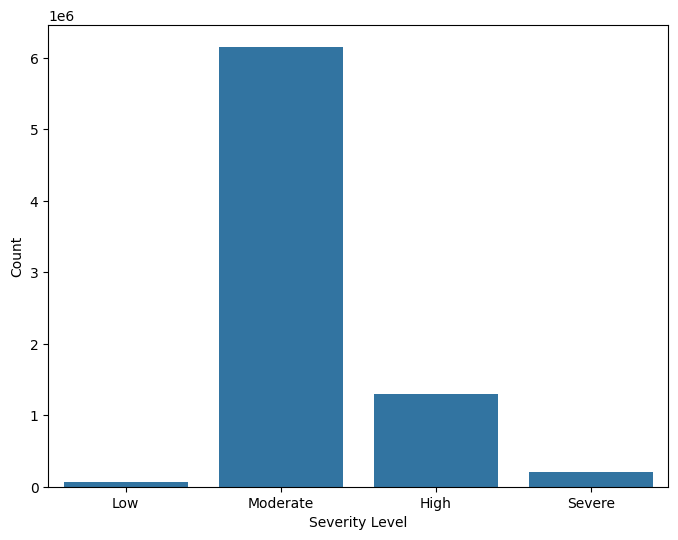

In [70]:
# explore columns individually

# severity levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df_hotspots, x='Severity_Level', order=severity_order)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

Most accidents are classified as Moderate (level 2) severity level, followed by High (level 3) severity level, then severe (level 4), and lastly Low (level 1).

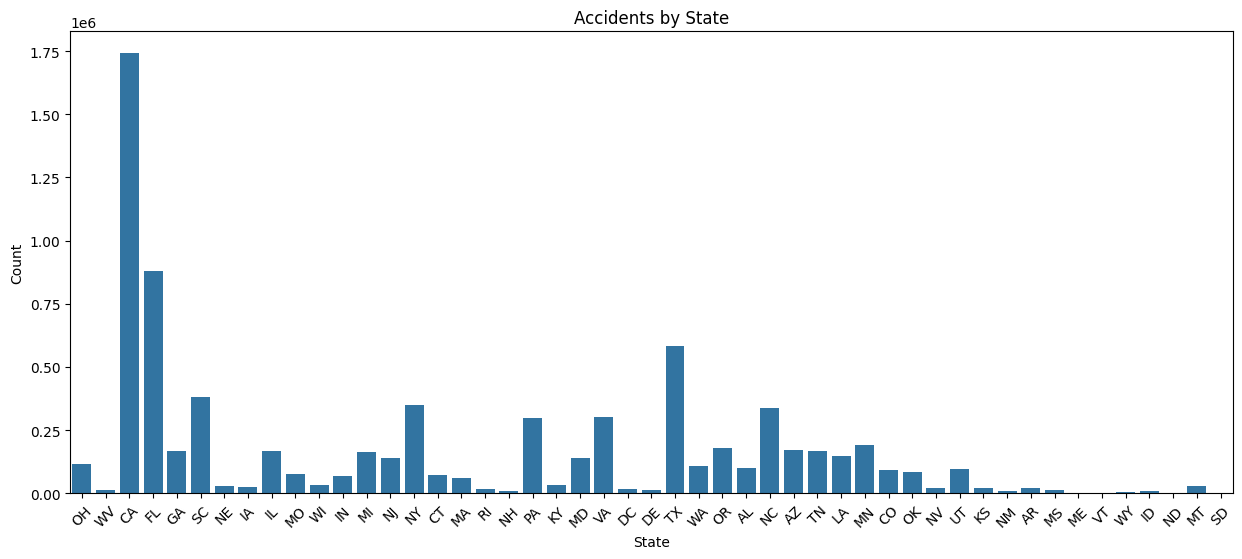

In [78]:
# accidents by state
plt.figure(figsize=(15, 6))
sns.countplot(data=df_hotspots, x='State')
plt.title('Accidents by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The most accidents occur in the state of California, followed by Florida, then Texas, and then SC/NY/PA/VA/NC.

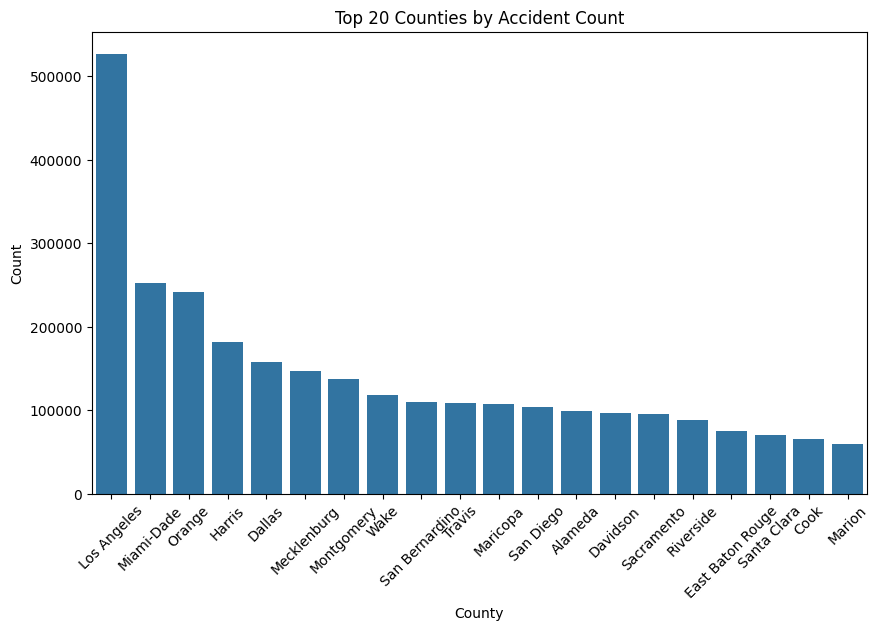

In [87]:
# accidents by county
top_counties = df_hotspots['County'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_counties.index, y=top_counties.values)
plt.title('Top 20 Counties by Accident Count')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most accidents occur in the county of Los Angeles of CA, followed by the counties of Miami-Dade of Florida, Orange, then Dallas of TX.

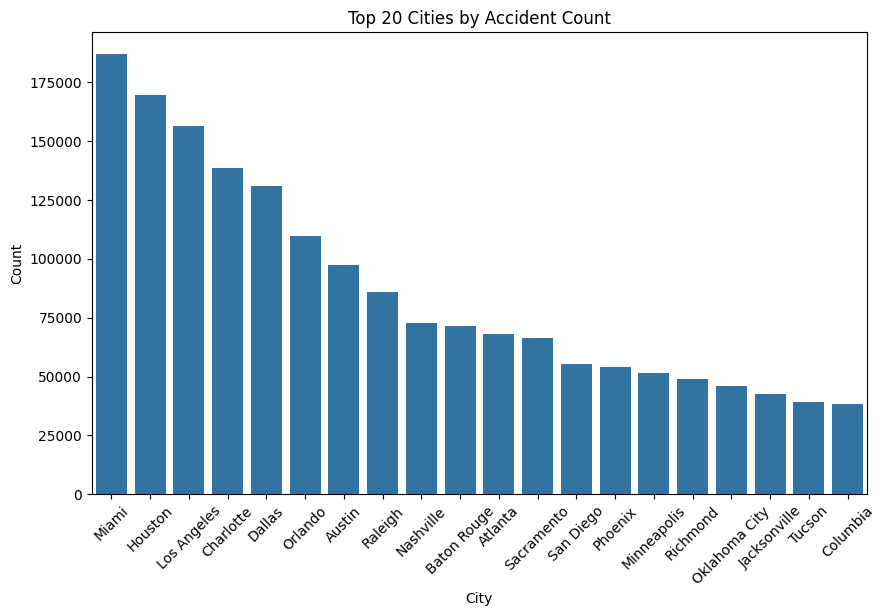

In [80]:
# accidents by city

top_cities = df_hotspots['City'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 20 Cities by Accident Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The cities with the most accidents are Miami, Houston, Los Angeles, Charlotte, then Dallas.

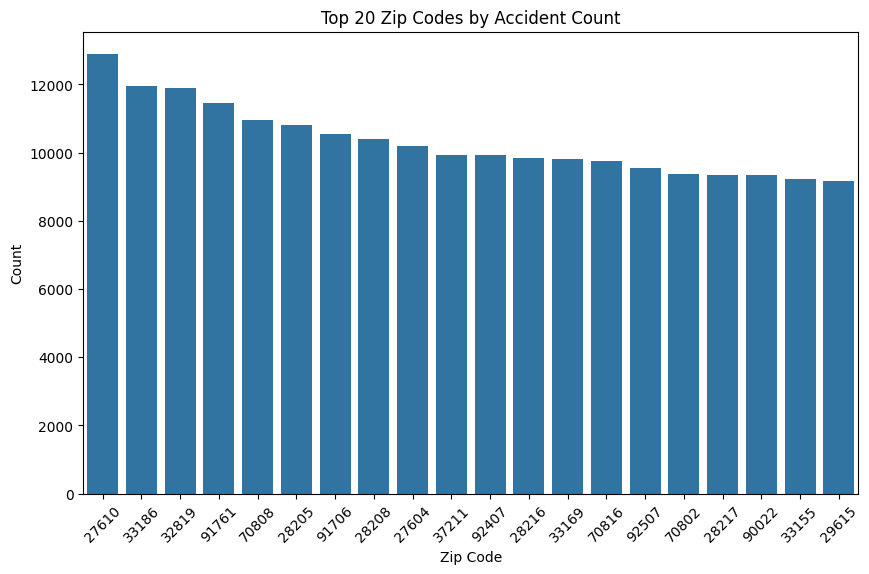

In [81]:
# explore accidents by zipcode
top_zip = df_hotspots['Zipcode'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_zip.index, y=top_zip.values)
plt.title('Top 20 Zip Codes by Accident Count')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

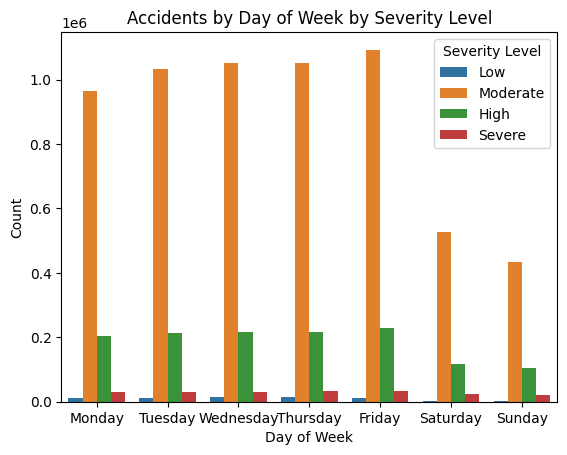

In [86]:
# accidents by day of week
plt.figure()
sns.countplot(data=df_hotspots, x='Day_of_week', hue='Severity_Level')

plt.title('Accidents by Day of Week by Severity Level')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

The day of week with the most accidents is Friday. There appears to be an upward trend in accidents as the days of the week go on from Monday through Friday.

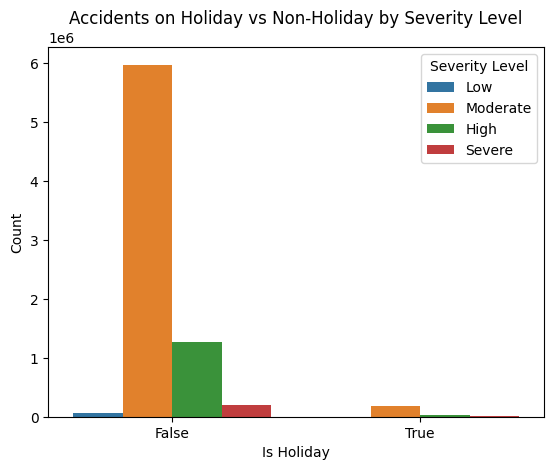

In [ ]:
# accidents on holiday vs non-holiday by severity level

plt.figure()
sns.countplot(data=df_hotspots, x='Is_Holiday', hue='Severity_Level')

plt.title('Accidents on Holiday vs Non-Holiday by Severity Level')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

There is not a significant increase in severity level of accidents due to holidays.

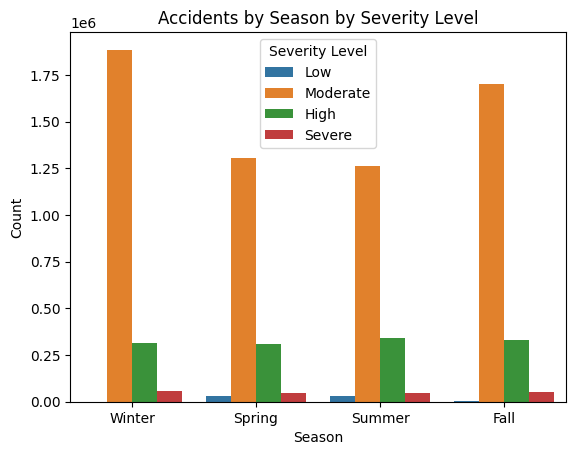

In [84]:
# accidents by season by severity level
plt.figure()
sns.countplot(data=df_hotspots, x='Season', hue='Severity_Level')

plt.title('Accidents by Season by Severity Level')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

The most accidents occur in Winter followed by Fall. This makes sense as Winter and Fall have more inclement weather that would be detrimental to driving.

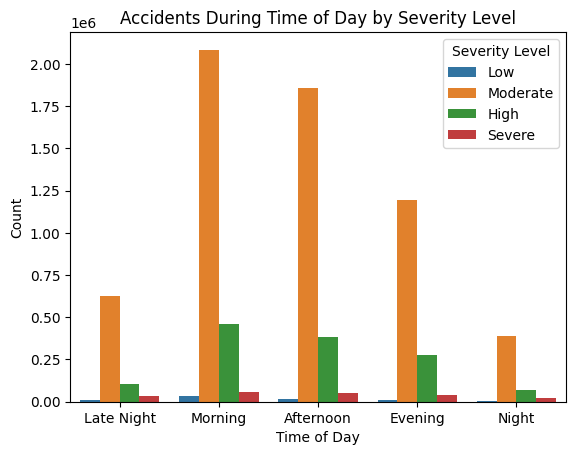

In [85]:
# accidents by time of day
plt.figure()
sns.countplot(data=df_hotspots, x='Time_period', hue='Severity_Level')

plt.title('Accidents During Time of Day by Severity Level')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

Visual assessment of plots split by severity level shows that the only severity level that changes between day of week, season and time of day is the moderate severity level mainly, and to a lesser extent the Highs. 

In [92]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[39.5, -98.35], zoom_start=5)  # center of US
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.sample(10000).iterrows()]
HeatMap(heat_data).add_to(m)
m.save('us_accident_heatmap.html')


## Exploratory Data Analysis - Objective 2 Environmental risk

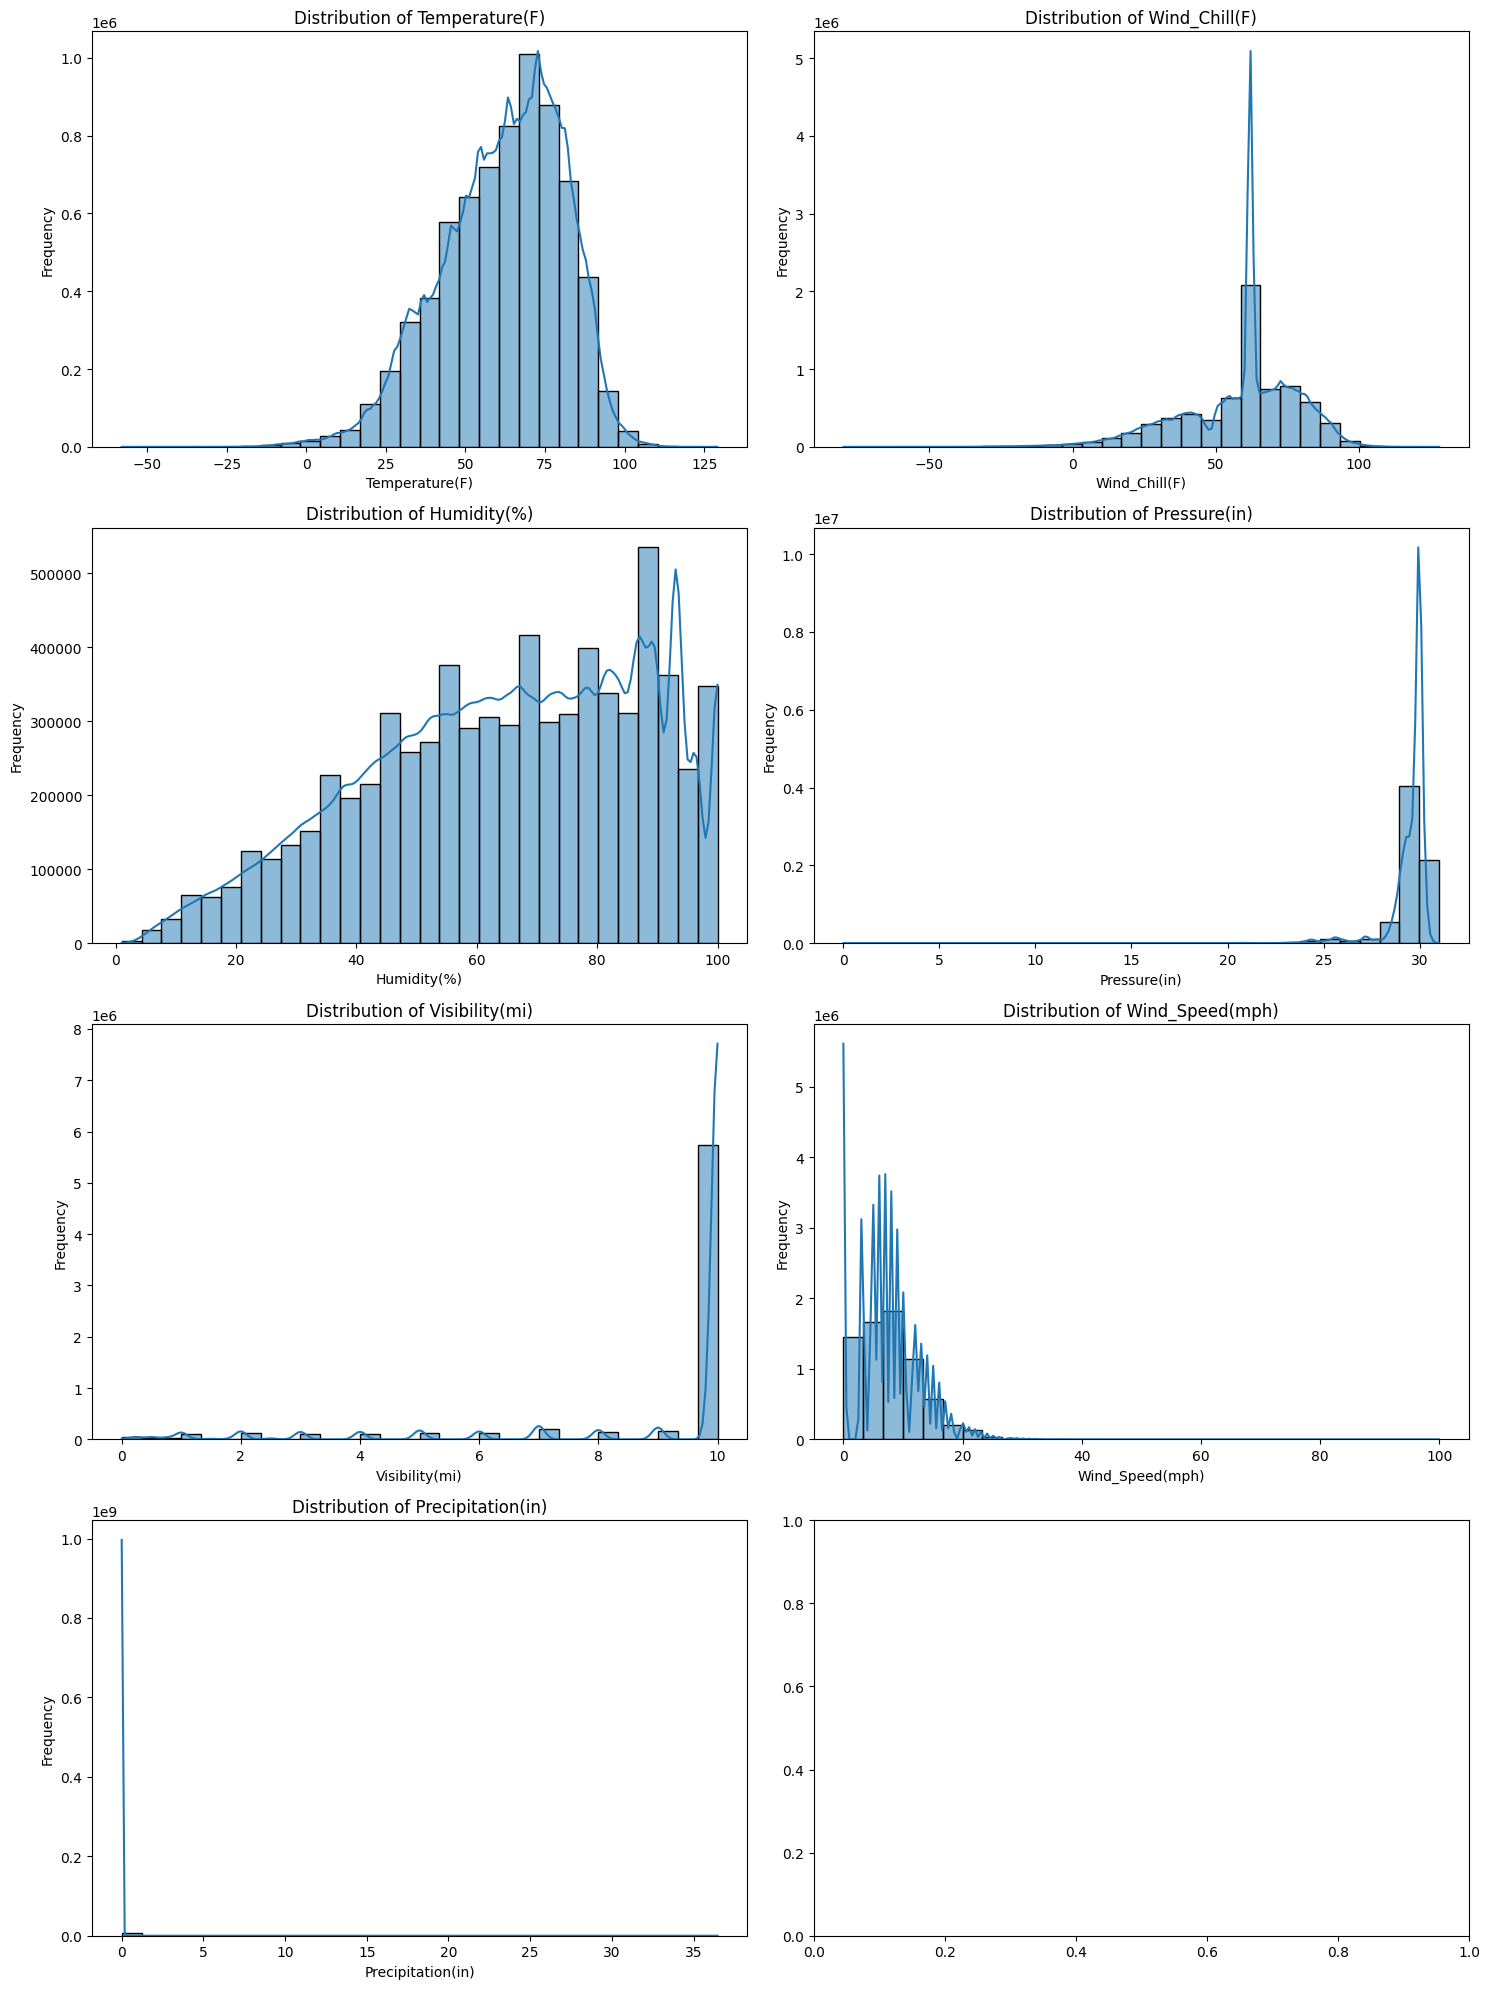

In [ ]:
weather_cols = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(weather_cols):
    sns.histplot(df_weather[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# took 2m 17.9s to run on 7/8/25

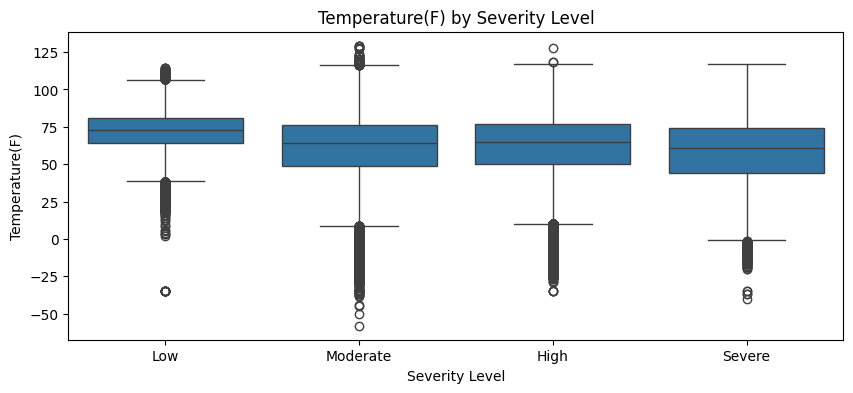

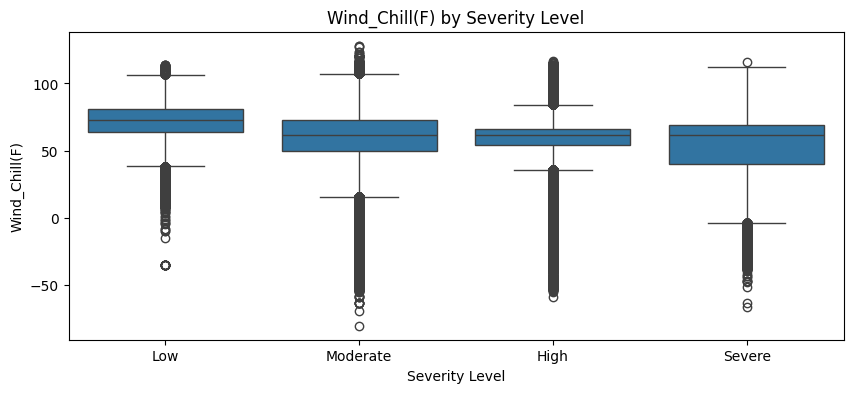

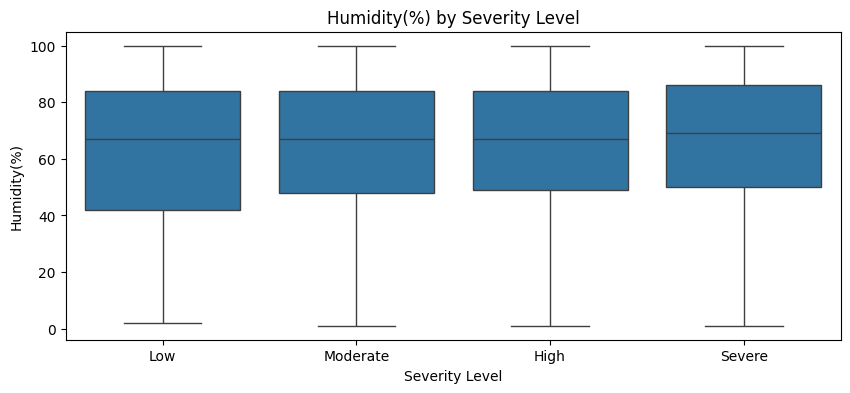

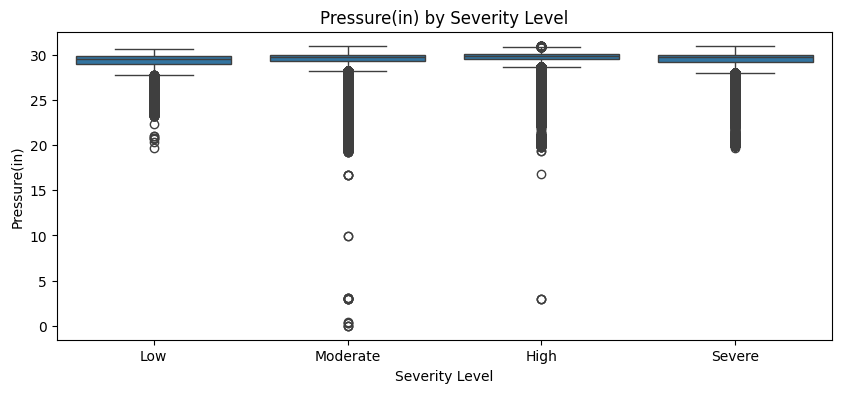

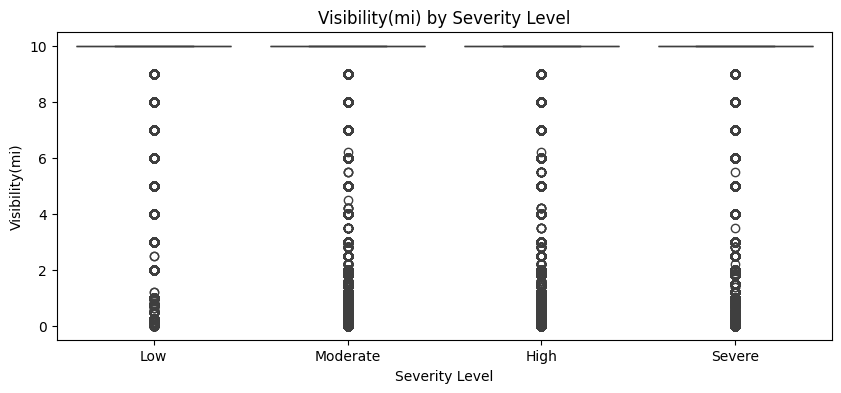

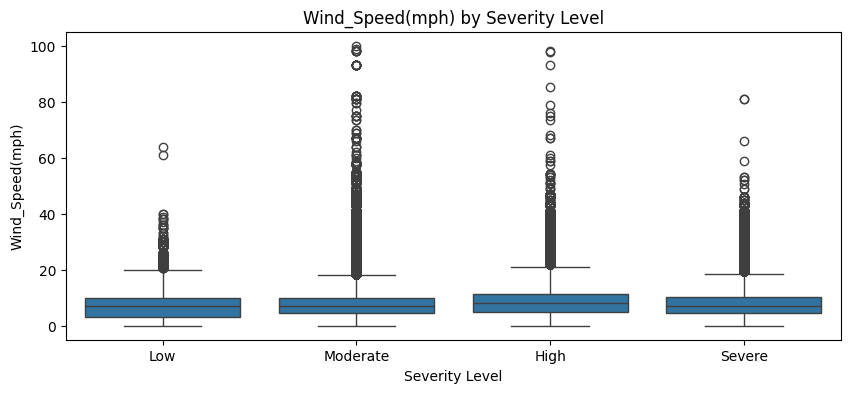

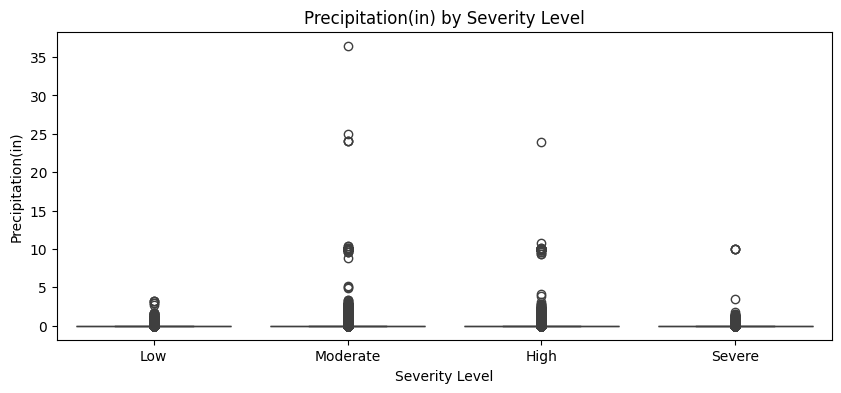

In [94]:
for col in weather_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_weather, x='Severity_Level', y=col, order=severity_order)
    plt.title(f'{col} by Severity Level')
    plt.xlabel('Severity Level')
    plt.ylabel(col)
    plt.show()


## Exploratory Data Analysis - Objective 3 Infrastructure considerations

In [40]:
# 

# Statistical Data Analysis
Perform statistical tests to validate patterns identified:
Chi-square tests for categorical variable relationships.
T-tests or ANOVA for comparing group means.
Check assumptions and use non-parametric when appropriate.
Analyze correlations between variables.
Identify significant factors that contribute to accident severity or frequency.
Use statistical measures to support your conclusions.
Document the methodology, assumptions, and limitations of statistical analysis.

## Statistical Data Analysis - Objective 1 Accident hotspots

In [41]:
# 

## Statistical Data Analysis - Objective 2 Environmental risk

In [42]:
# 

## Statistical Data Analysis - Objective 3 Infrastructure considerations

In [43]:
# 

# Evaluation
Interpret your findings in the context of the business problem. Assess whether your analysis provides actionable insights and addresses the key questions identified in the business understanding phase.

## Business Insight/Recommendation 1

## Business Insight/Recommendation 2

## Business Insight/Recommendation 3

### Tableau Dashboard link

## Conclusion and Next Steps
Text here